<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_17(1)_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%83%90%EC%83%89_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

클러스터링
==
## kMeans, DBSCAN 비교
데이터
--
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임
- 이 파일을 현재 작업중인 (쥬피터 노트북이 실행되는) 폴더 아래에 data 폴더를 만들고 data 폴더로 복사한다

## 한글 폰트 설치

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# '-' 기호 보이게 하기
mpl.rcParams['axes.unicode_minus'] = False

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


## 여기서 런타임 - 런타임 다시 시작을 실행한 후에 위의 코드를 다시한번 실행하여야 한다

Text(0, 0.5, 'y 축입니다')

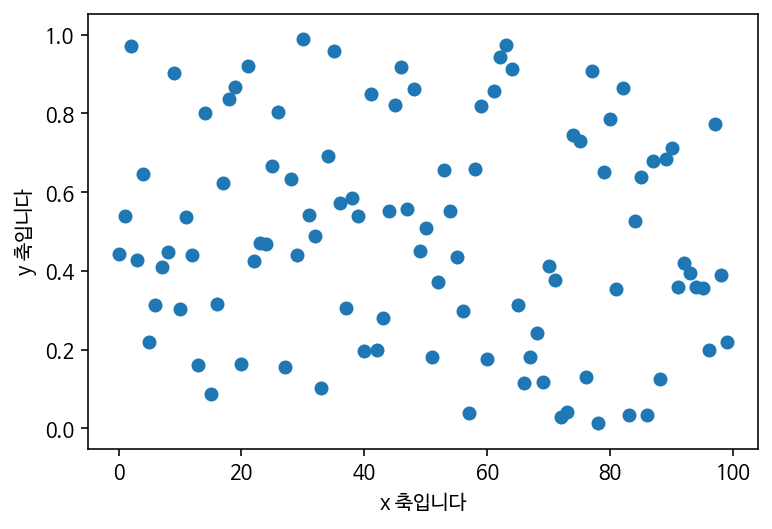

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = range(100)
y = np.random.rand(100)
plt.scatter(x,y)
plt.xlabel('x 축입니다')
plt.ylabel('y 축입니다')

필요한 라이브러리(모듈) 설치
--

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
# 데이터 다운로드
import os, os.path, shutil
if not os.path.exists("./data"):
    os.makedirs("./data")
!wget https://goo.gl/Cx8Rzw -O ./data/power.xls

--2020-01-28 13:31:41--  https://goo.gl/Cx8Rzw
Resolving goo.gl (goo.gl)... 74.125.124.113, 74.125.124.138, 74.125.124.100, ...
Connecting to goo.gl (goo.gl)|74.125.124.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/w9m6n2zbl2986of/%EC%8B%9C%EB%8F%84%EB%B3%84_%EC%9A%A9%EB%8F%84%EB%B3%84.xls?dl=0 [following]
--2020-01-28 13:31:41--  https://www.dropbox.com/s/w9m6n2zbl2986of/%EC%8B%9C%EB%8F%84%EB%B3%84_%EC%9A%A9%EB%8F%84%EB%B3%84.xls?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w9m6n2zbl2986of/%EC%8B%9C%EB%8F%84%EB%B3%84_%EC%9A%A9%EB%8F%84%EB%B3%84.xls [following]
--2020-01-28 13:31:41--  https://www.dropbox.com/s/raw/w9m6n2zbl2986of/%EC%8B%9C%EB%8F%84%EB%B3%84_%EC%9A%A9%EB%8F%84%EB%B3%84.xls
Reusing existing connection to www

데이터 읽기
--

In [0]:
power_data = pd.read_excel('data/power.xls')
print(power_data.shape)

(19, 28)


In [0]:
power = power_data.set_index('구분')

In [0]:
power = power.drop(['합계', '개성'], errors='ignore')

In [0]:
power = power.drop('합계', axis=1)

In [0]:
power = power[['서비스업', '제조업']]
power.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


스캐터 플롯
--

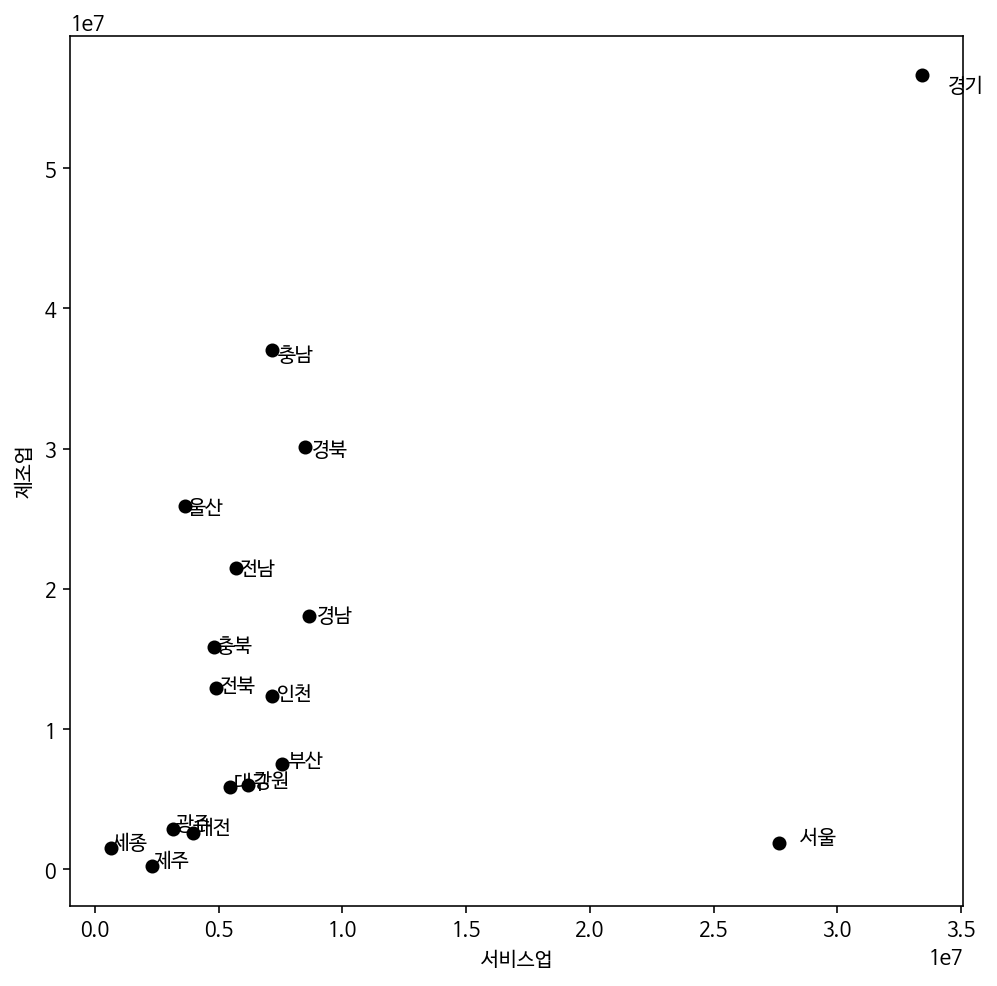

In [0]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

In [0]:
power = power.drop(['경기', '서울'])

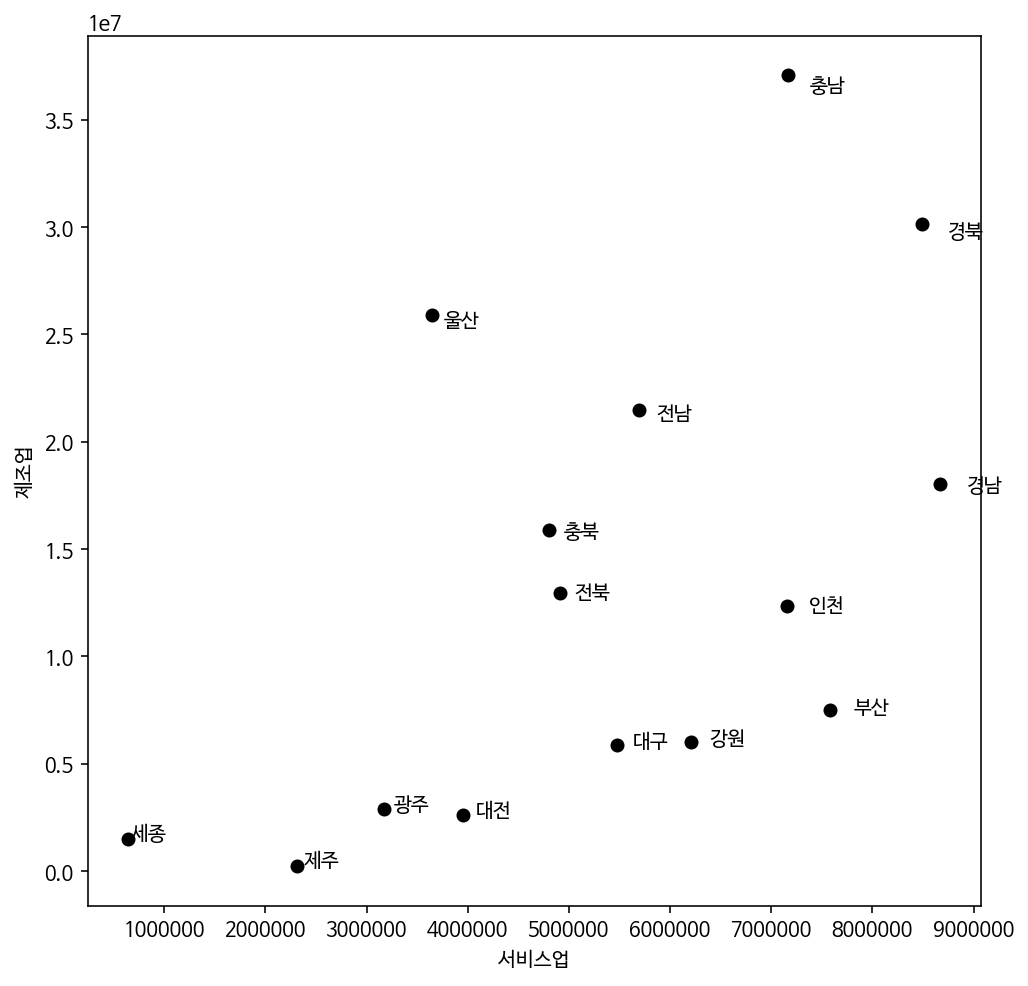

In [0]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

# 클러스터링

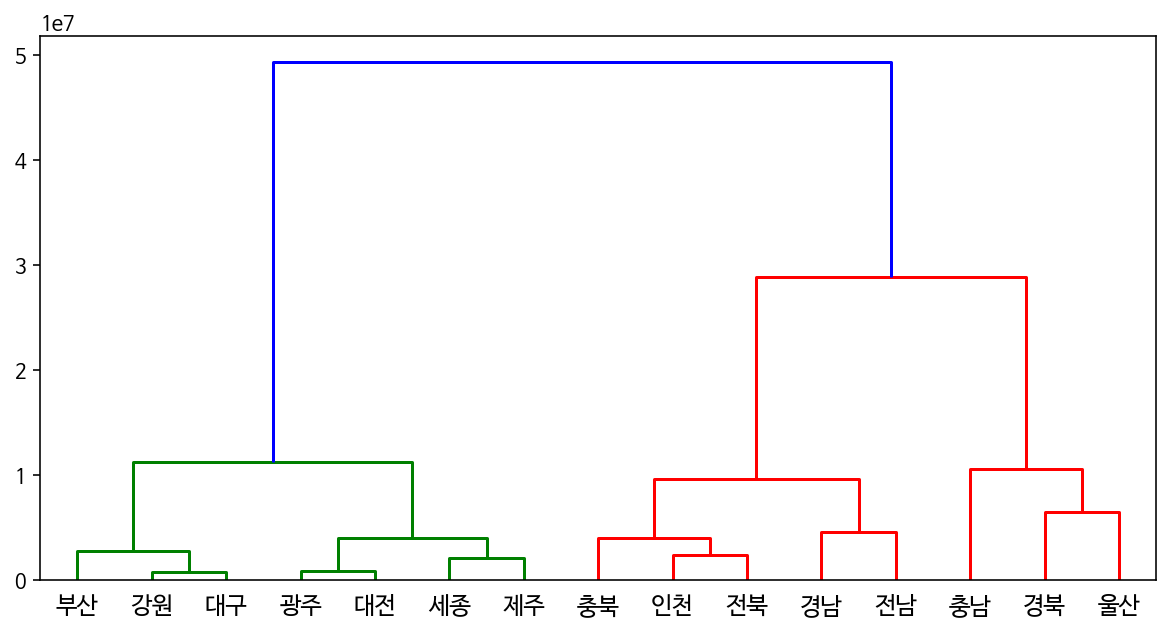

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
link_dist = linkage(power, metric='euclidean', method='ward')  
dendrogram(link_dist, labels=power.index)
plt.show()

In [0]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=6).fit(power)
print(k.n_clusters)

6


In [0]:
power['클러스터'] = k.labels_
power.head(10)

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,5
경남,8667737,18053778,4
경북,8487402,30115601,1
광주,3174973,2910768,0
대구,5470438,5862633,5
대전,3955921,2608343,0
부산,7582169,7512588,5
세종,645424,1502922,0
울산,3649386,25883132,1


In [0]:
power.drop('클러스터', axis = 1, inplace=True) ; power.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


In [0]:
centers = k.cluster_centers_ ; centers

array([[ 2521262.5       ,  1815892.5       ],
       [ 6068394.        , 27999366.5       ],
       [ 5623124.        , 13739046.33333333],
       [ 7164439.        , 37057955.        ],
       [ 7179198.        , 19753852.        ],
       [ 6418785.33333333,  6459169.        ]])

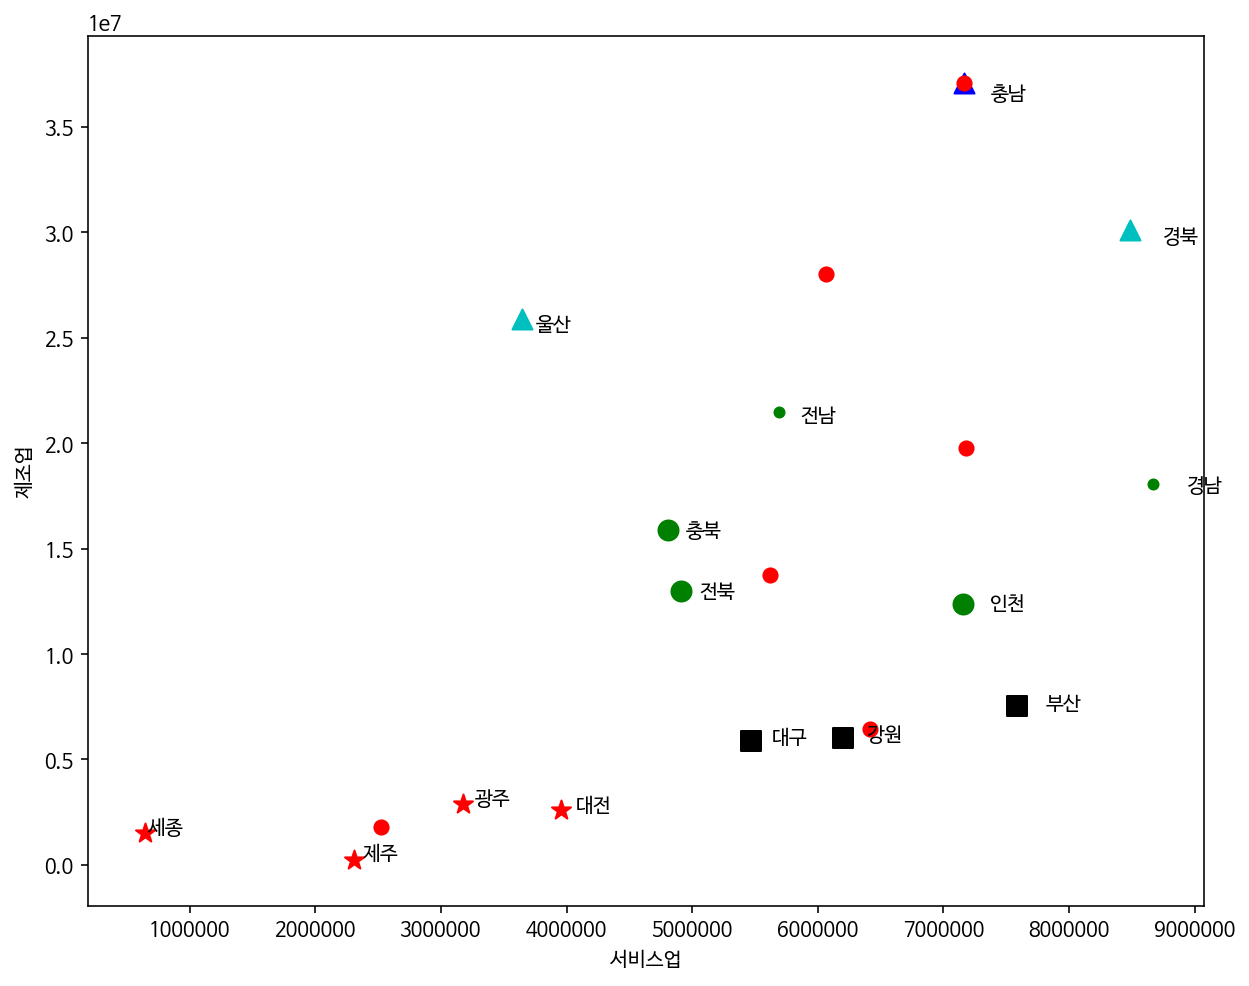

In [0]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
power[['서비스업', '제조업']] = scaler.fit_transform(power[['서비스업', '제조업']])
power

,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632
광주,-0.963503,-0.960380
대구,0.065323,-0.689116
대전,-0.613482,-0.988171
부산,1.011798,-0.537491
세종,-2.097244,-1.089755
울산,-0.750871,1.150686


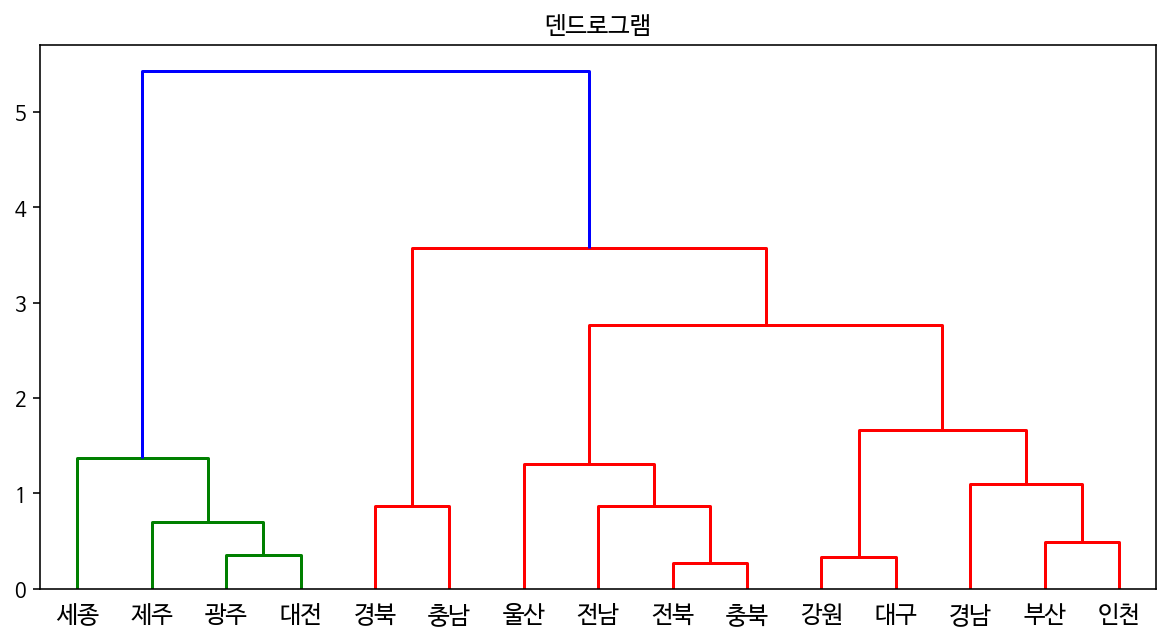

In [0]:
Z = linkage(power, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power.index)
plt.show()

In [0]:
k = KMeans(n_clusters= 4).fit(power)
centers = k.cluster_centers_

<Figure size 432x288 with 0 Axes>

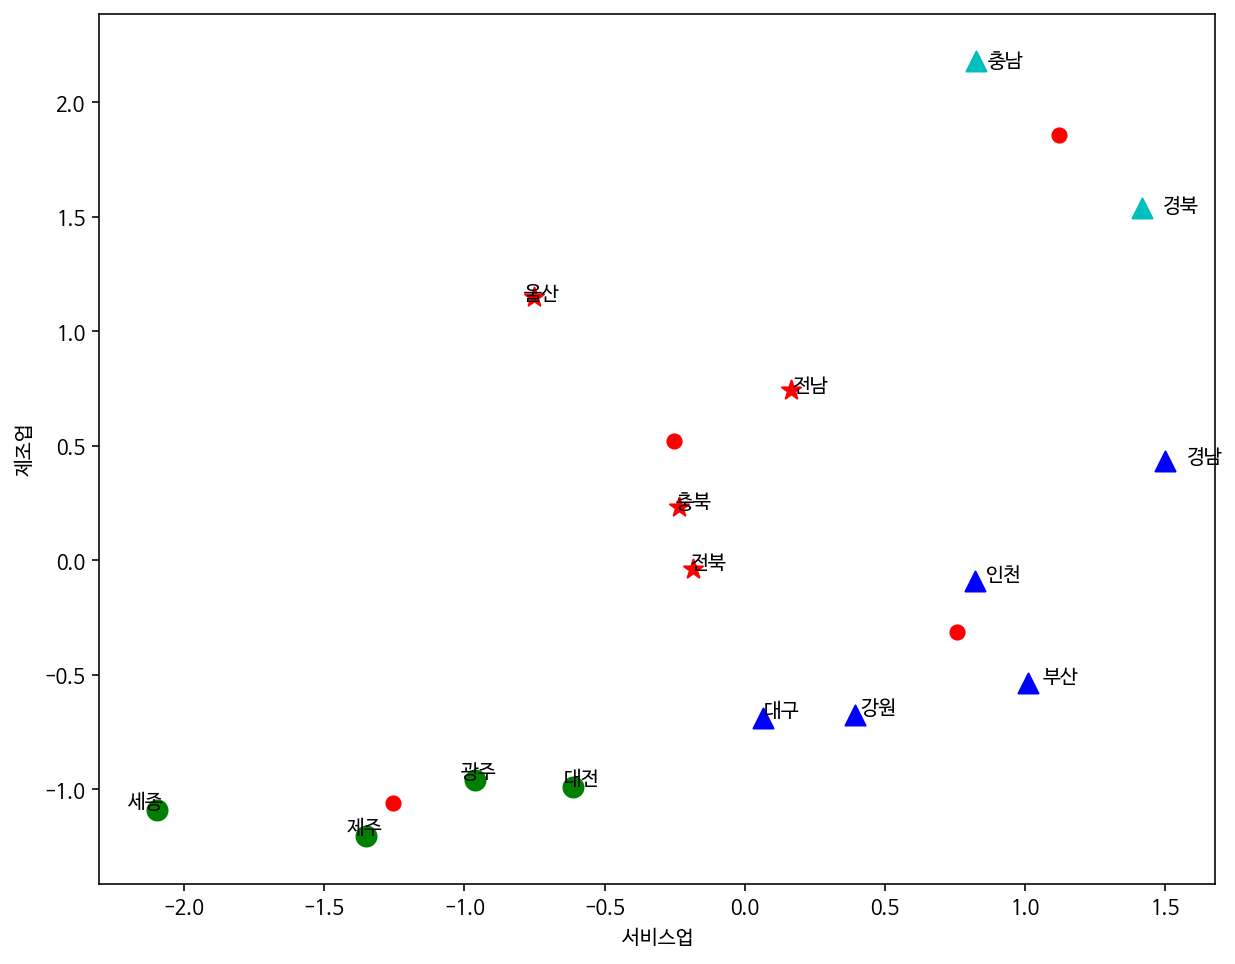

In [0]:
plt.clf()
plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.05, power['제조업'][n]*0.99, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

In [0]:
# 모든 특성 고려
power_data.head().T

,0,1,2,3,4
구분,강원,개성,경기,경남,경북
주거용,1940933,0,16587710,4260988,3302463
공공용,1400421,0,5533662,1427560,1578115
서비스업,6203749,0,33434551,8667737,8487402
업무용합계,7604170,0,38968213,10095297,10065517
농림어업,607139,0,2371347,2141813,1747462
광업,398287,0,317263,95989,224568
제조업,6002286,0,56603327,18053778,30115601
식료품제조,546621,0,2544420,932743,566071
"섬유,의류",13027,0,2109963,346974,3780171


In [0]:
power2 = power_data.set_index('구분')
power2.drop(['업무용합계', '산업용합계', '합계'], axis=1, 
           inplace=True, errors='ignore')
power2.drop(['합계','개성','경기','서울'], inplace=True,errors='ignore')

In [0]:
power2

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418
경남,4260988,1427560,8667737,2141813,95989,18053778,932743,346974,60160,817685,28486,1865583,178498,429920,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662
경북,3302463,1578115,8487402,1747462,224568,30115601,566071,3780171,72680,361772,44402,3653665,217771,1269917,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104
광주,1954876,565527,3174973,74608,2898,2910768,161072,295922,6782,41827,22038,391151,27221,20728,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049
대구,3151904,826396,5470438,69142,5858,5862633,212626,1057342,16215,445646,46804,418485,85871,68137,317580,661307,516493,58446,180189,252662,1381273,68127,41814,33616
대전,1872890,954681,3955921,28643,3326,2608343,204171,41687,4311,539332,14802,630776,97278,53481,56535,69342,77970,2949,83609,474561,218191,5439,31657,2252
부산,4473510,1305876,7582169,107927,25289,7512588,532943,528513,51980,27240,33000,438833,74733,77771,2426694,872952,904149,4913,107717,90644,1046529,231141,49733,13104
세종,384903,299675,645424,69469,16364,1502922,110211,70617,1324,350896,2998,261583,24557,305848,32345,11390,26185,14319,33539,170366,79009,0,5132,2603
울산,1487143,489865,3649386,80221,20103,25883132,187738,943299,12286,620457,3325,14870740,22508,183981,4671005,393469,169132,5053,381602,24165,2367150,1020610,4984,1626


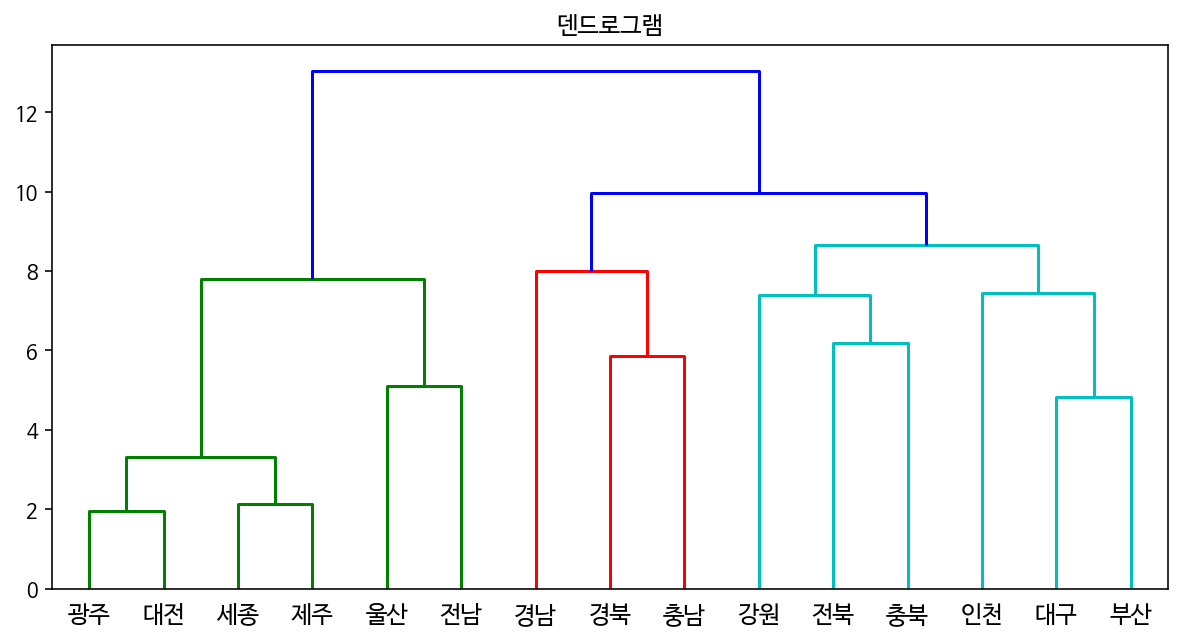

In [0]:
power3 = pd.DataFrame(scaler.fit_transform(power2), columns=power2.columns,
                      index=power2.index)

Z = linkage(power3, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power3.index)
plt.show()

15


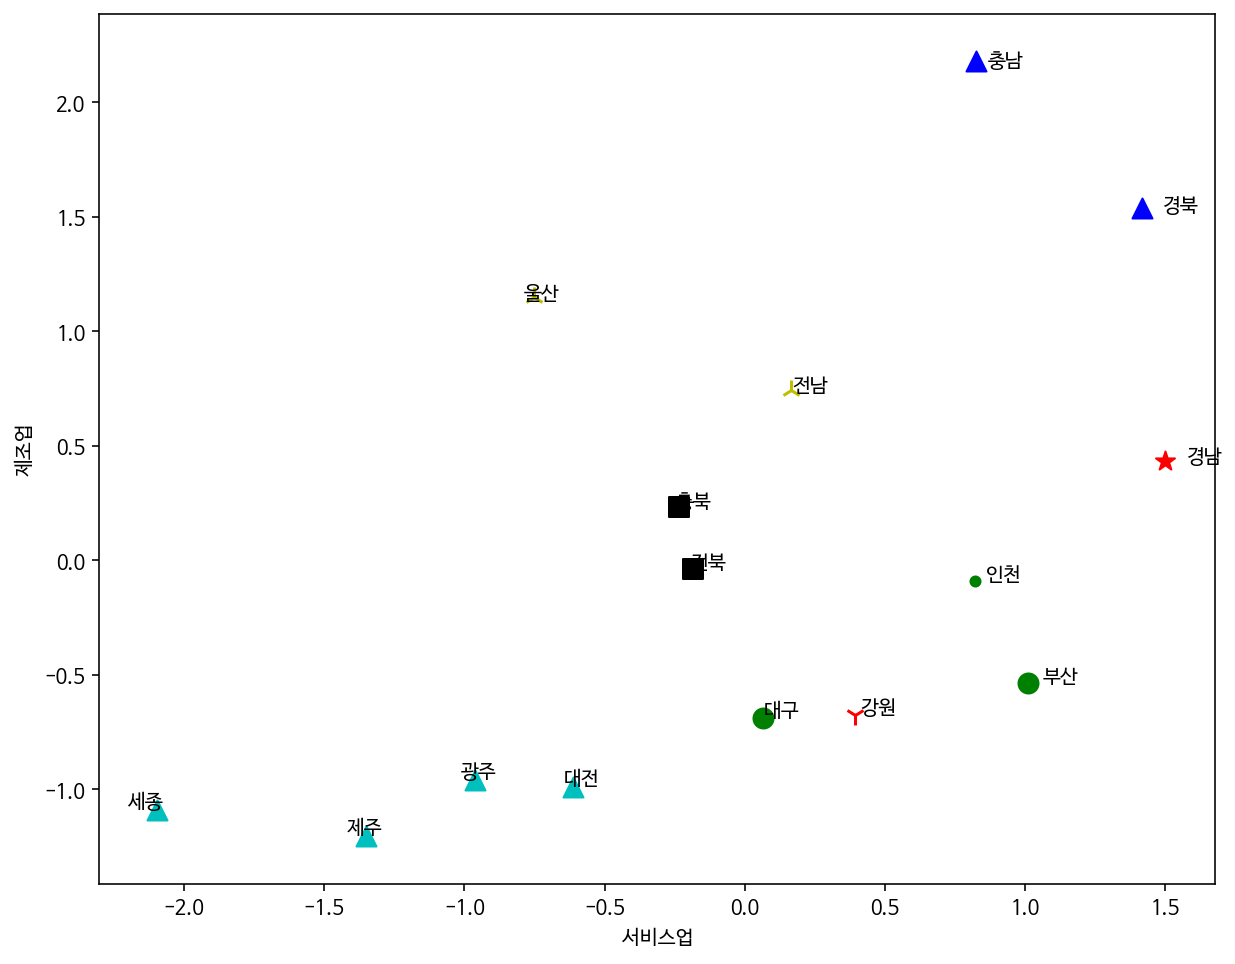

In [0]:
k = KMeans(n_clusters=8).fit(power3)
n_samples = power3.shape[0]
print(n_samples)

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(n_samples):
    label = k.labels_[n]
    plt.scatter(power3['서비스업'][n], power3['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power3['서비스업'][n]*1.05, power3['제조업'][n]*0.99, power3.index[n])
    

In [0]:
power3

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,,,,
강원,-0.447461,1.107363,0.393992,-0.316151,2.742496,-0.676282,-0.050383,-0.616388,-0.451440,-1.067457,-0.834440,-0.715648,-0.388092,2.948060,-0.545482,-0.948359,-0.828941,-0.656697,-0.830062,-0.527178,-0.976346,-0.336181,-0.556318,-0.886117
경남,1.578961,1.176534,1.498349,1.305632,0.008994,0.431200,0.885979,-0.251316,-0.199913,1.028648,0.191478,-0.357561,-0.220823,-0.291510,0.272688,2.649920,2.895248,-0.222754,1.809963,-0.354695,1.289121,3.279342,1.110336,0.677332
경북,0.741750,1.560268,1.417523,0.888898,1.171658,1.539632,-0.003216,3.501870,-0.123130,-0.175988,0.978053,0.021250,-0.151014,0.541726,2.359112,0.988392,0.661467,0.236074,1.293236,0.926336,1.511864,-0.307656,-0.239826,1.717722
광주,-0.435282,-1.020610,-0.963503,-0.878909,-0.832773,-0.960380,-0.985356,-0.307126,-0.527273,-1.021363,-0.127185,-0.669924,-0.489725,-0.697409,-0.829919,-0.694982,-0.502382,-0.373569,-0.238525,-0.287994,-0.534146,-0.529049,-0.552847,-0.439775
대구,0.610246,-0.355709,0.065323,-0.884685,-0.806008,-0.689116,-0.860335,0.525262,-0.469421,0.045628,1.096761,-0.664133,-0.385472,-0.650381,-0.758493,0.399217,0.130952,3.389922,-0.406647,-0.453754,0.429803,-0.411663,-0.363103,0.180989
대전,-0.506892,-0.028737,-0.613482,-0.927483,-0.828903,-0.988171,-0.880839,-0.585057,-0.542427,0.293170,-0.484791,-0.619159,-0.365196,-0.664919,-0.835579,-0.883638,-0.743391,-0.590002,-0.694371,-0.375678,-0.860175,-0.528492,-0.430911,-0.927319
부산,1.764586,0.866387,1.011798,-0.843699,-0.630305,-0.537491,-0.083553,-0.052856,-0.250080,-1.059906,0.414561,-0.659822,-0.405271,-0.640825,-0.135670,0.857876,0.903875,-0.449156,-0.622550,-0.510761,0.058538,-0.107861,-0.310237,-0.543843
세종,-1.806555,-1.698213,-2.097244,-0.884340,-0.711008,-1.089755,-1.108696,-0.553430,-0.560746,-0.204725,-1.068149,-0.697373,-0.494461,-0.414584,-0.842723,-1.009226,-0.846642,0.225388,-0.843536,-0.482711,-1.014542,-0.538628,-0.607990,-0.914916
울산,-0.843818,-1.213457,-0.750871,-0.872977,-0.677199,1.150686,-0.920690,0.400589,-0.493517,0.507522,-1.051989,2.397623,-0.498103,-0.535470,0.527077,-0.181218,-0.561629,-0.439116,0.193389,-0.534153,1.523243,1.363437,-0.608978,-0.949440


## 클러스터링 비교

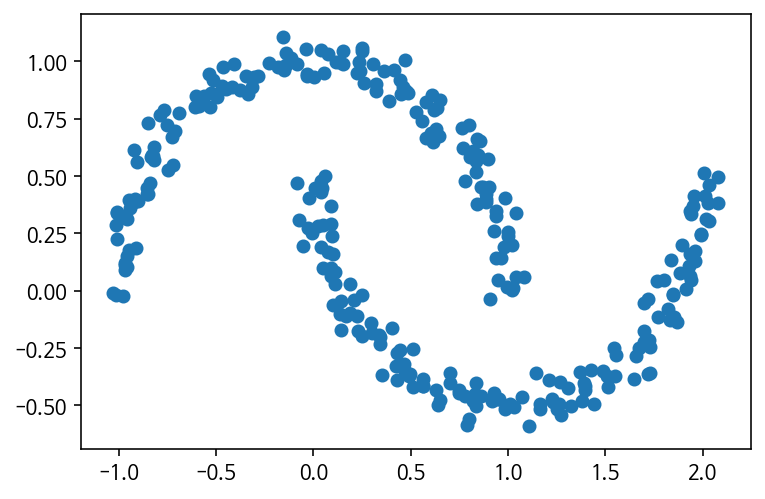

In [0]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=300, noise=0.05, random_state=11)
plt.scatter(X[:,0], X[:,1])
plt.show()

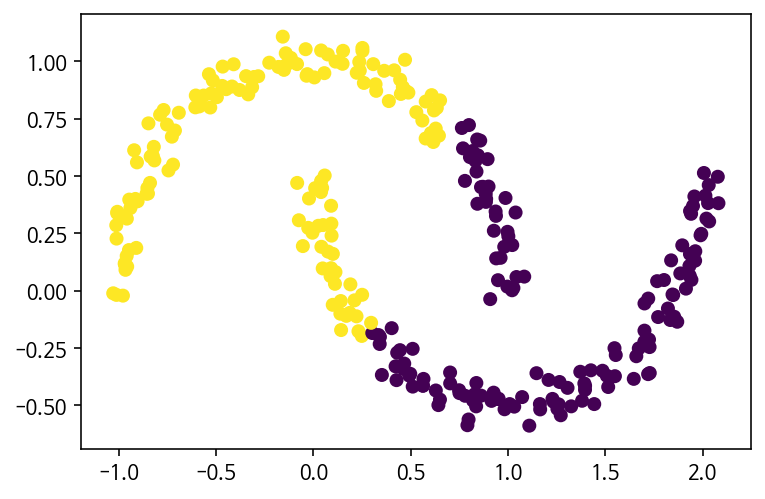

In [0]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

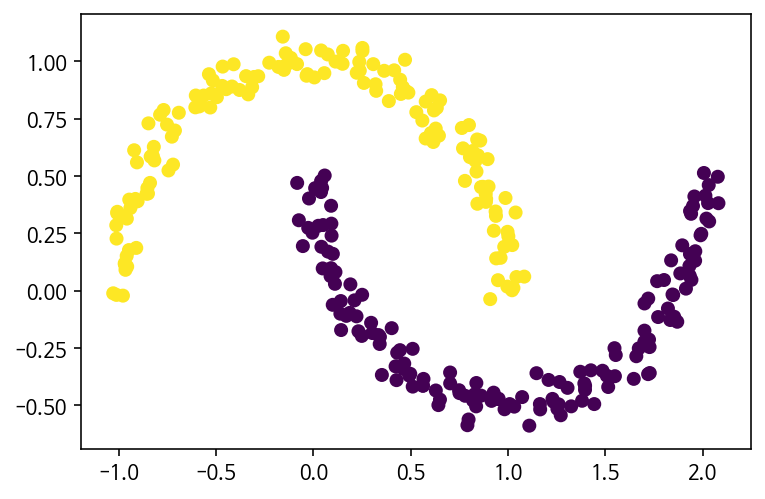

In [0]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

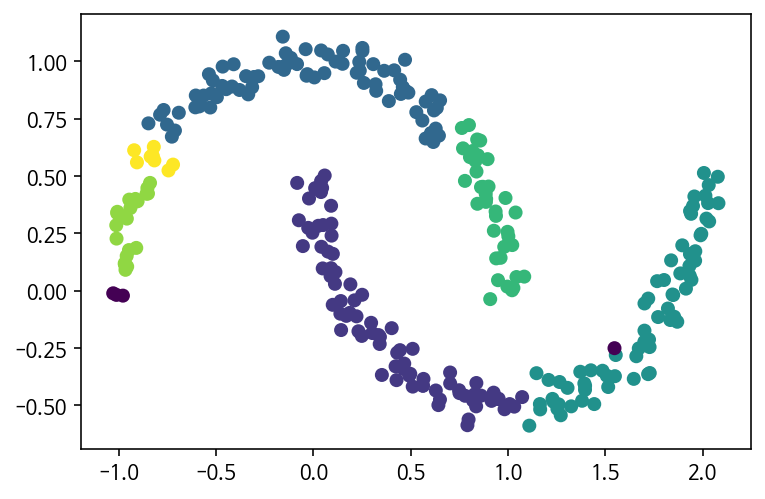

In [0]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

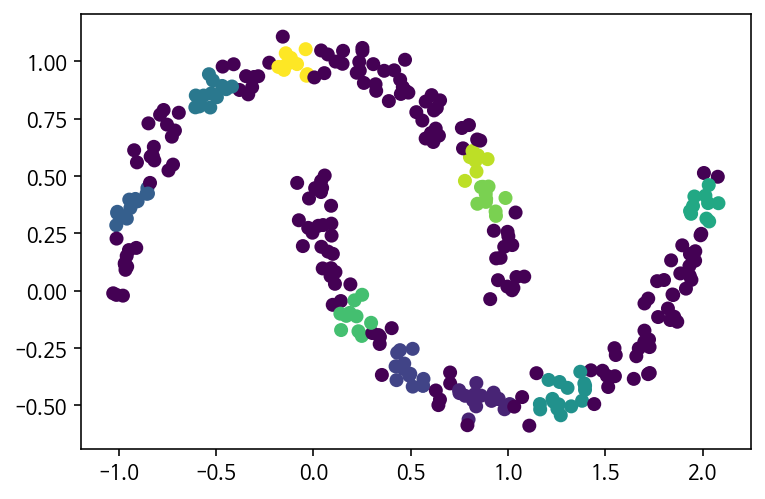

In [0]:
dbscan = DBSCAN(eps=0.1, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

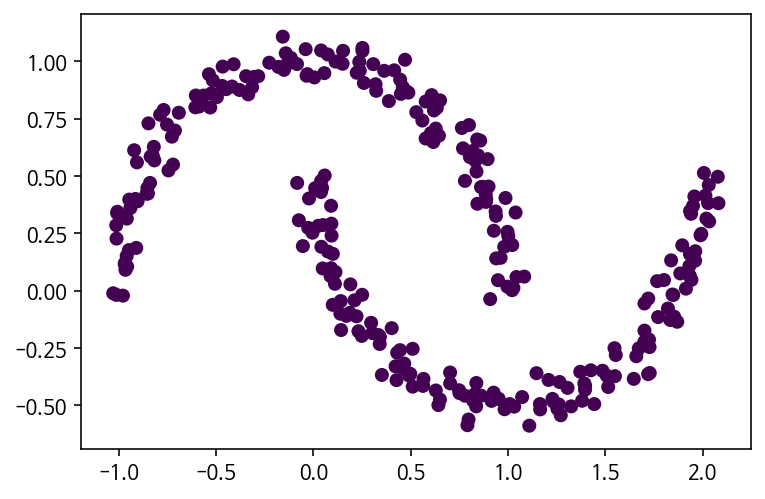

In [0]:
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

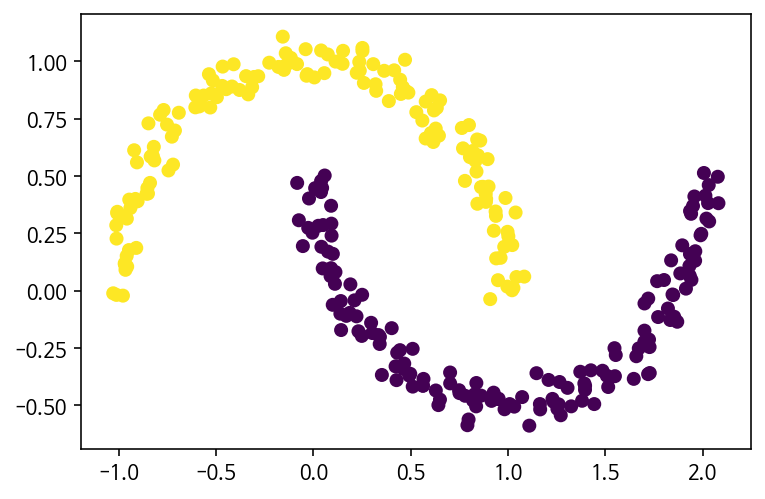

In [0]:
dbscan = DBSCAN(eps=0.2, min_samples=6, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

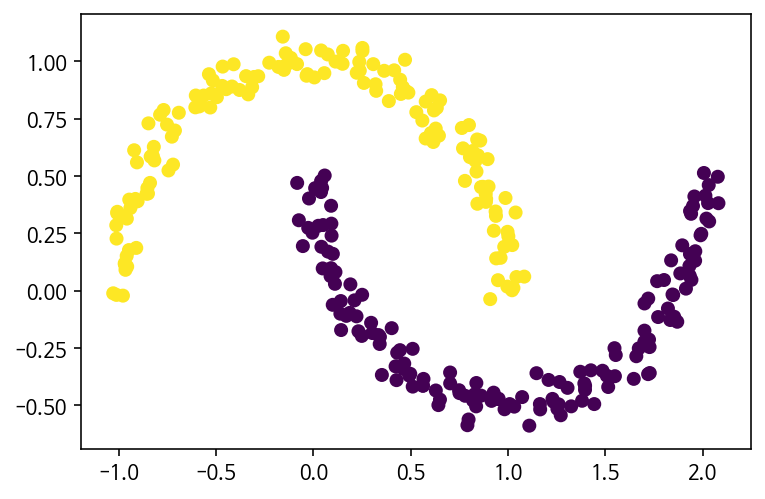

In [0]:
dbscan = DBSCAN(eps=0.2, min_samples=15, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)